In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,RobustScaler
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [16]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [17]:
print(heart_disease['variables'])

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [18]:
X.columns=['age','gender','cp','blood_pressure','cholestrol','blood_sugar>120_mg/dl','rest_ecg','max_heart_rate','exercise_induced_angina','old_peak','slope','no_of_major_blood_vessels_colored_by_fluoroscopy','thal']
y.columns=['diagnosis']

In [19]:
heart_disease['metadata']

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

In [22]:
#sns.histplot(y)

In [23]:
cols=(X.isna().sum()[X.isna().sum()>0].index).to_list()

In [24]:
#sns.displot(X[cols])

In [25]:
mode_imputer=SimpleImputer(strategy='most_frequent')
X[cols]=mode_imputer.fit_transform(X[cols])

C:\Users\Acss\AppData\Local\Temp\ipykernel_16572\2978028605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols]=mode_imputer.fit_transform(X[cols])


In [26]:
X.head()

,age,gender,cp,blood_pressure,cholestrol,blood_sugar>120_mg/dl,rest_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,no_of_major_blood_vessels_colored_by_fluoroscopy,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [27]:
'''plt.figure(figsize=(15,5))
for i in cols:
    sns.displot(X[i],kind='kde')
    plt.show'''

"plt.figure(figsize=(15,5))\nfor i in cols:\n    sns.displot(X[i],kind='kde')\n    plt.show"

In [28]:
'''for i in numcols:
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=X[i],y=y['num'])
    plt.show()'''

"for i in numcols:\n    plt.figure(figsize=(15,5))\n    sns.scatterplot(x=X[i],y=y['num'])\n    plt.show()"

In [29]:
X.describe()

,age,gender,cp,blood_pressure,cholestrol,blood_sugar>120_mg/dl,rest_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,no_of_major_blood_vessels_colored_by_fluoroscopy,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.7,random_state=8)

In [31]:
xtrain.describe()

,age,gender,cp,blood_pressure,cholestrol,blood_sugar>120_mg/dl,rest_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,no_of_major_blood_vessels_colored_by_fluoroscopy,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.745283,0.683962,3.122642,131.896226,244.608491,0.141509,0.990566,149.528302,0.330189,1.070283,1.594340,0.608491,4.660377
std,9.113358,0.466028,0.965792,16.907291,56.148605,0.349371,0.997583,22.442220,0.471394,1.211679,0.620018,0.914612,1.931955
min,34.000000,0.000000,1.000000,94.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.750000,0.000000,3.000000,120.000000,205.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,235.500000,0.000000,0.500000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,273.250000,0.000000,2.000000,167.250000,1.000000,1.800000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [32]:
numcols=[]
objcols=[]
for i in xtrain.columns:
    if(X[i].value_counts().count()>5):
        numcols.append(i)
    else:
        objcols.append(i)

In [33]:
# ss=StandardScaler()
# xtrain[numcols]=pd.DataFrame(ss.fit_transform(xtrain[numcols]),index=xtrain.index,columns=numcols)
# xtest[numcols]=pd.DataFrame(ss.transform(xtest[numcols]),index=xtest.index,columns=numcols)

In [34]:
ss=RobustScaler()
xtrain[numcols]=pd.DataFrame(ss.fit_transform(xtrain[numcols]),index=xtrain.index,columns=numcols)
xtest[numcols]=pd.DataFrame(ss.transform(xtest[numcols]),index=xtest.index,columns=numcols)

In [35]:
# ss=MaxAbsScaler()
# xtrain[numcols]=pd.DataFrame(ss.fit_transform(xtrain[numcols]),index=xtrain.index,columns=numcols)
# xtest[numcols]=pd.DataFrame(ss.transform(xtest[numcols]),index=xtest.index,columns=numcols)

In [36]:
xtrain.head()

,age,gender,cp,blood_pressure,cholestrol,blood_sugar>120_mg/dl,rest_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,no_of_major_blood_vessels_colored_by_fluoroscopy,thal
12,0.000000,1,3,0.00,0.300366,1,2,-0.283688,1,-0.111111,2,1.0,6.0
94,0.571429,0,3,0.25,0.241758,0,2,0.567376,0,-0.444444,1,0.0,3.0
129,0.489796,0,4,-0.30,-0.388278,0,0,0.312057,0,-0.444444,1,0.0,3.0
301,0.081633,0,2,0.00,0.007326,0,2,0.624113,0,-0.444444,2,1.0,3.0
62,0.163265,1,4,-0.10,-0.285714,0,2,-0.595745,1,0.777778,2,3.0,7.0


<Axes: >

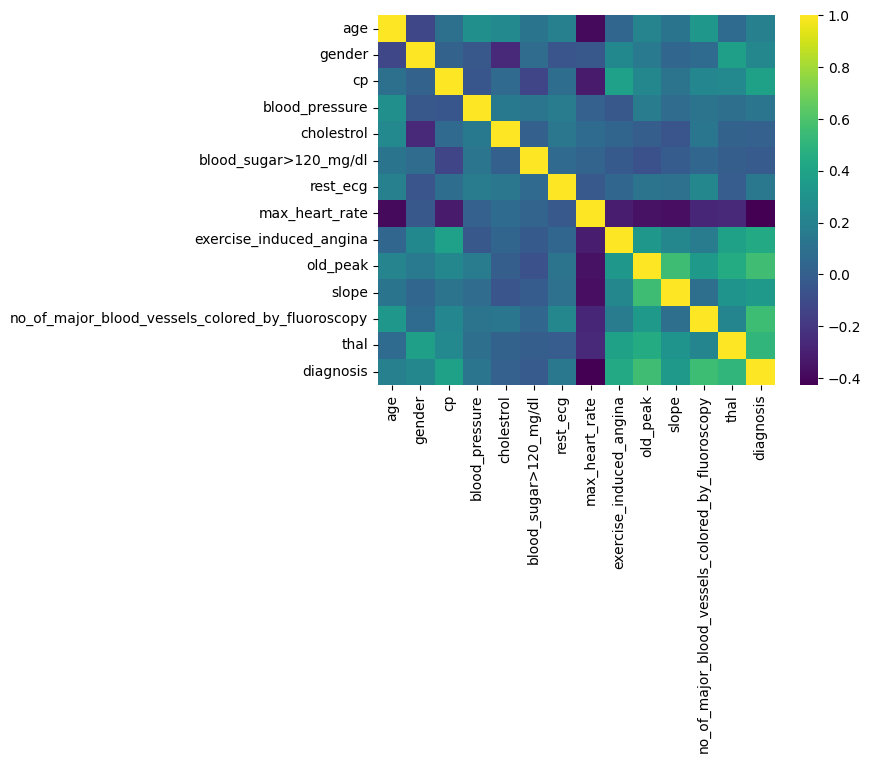

In [37]:
sns.heatmap((xtrain.join(ytrain)).corr(),cmap="viridis")

In [38]:
new_ytrain=pd.DataFrame()
new_ytest=pd.DataFrame()
new_ytrain['diagnosis']=ytrain['diagnosis'].apply(lambda x: 0 if x==0 else 1)
new_ytest['diagnosis']=ytest['diagnosis'].apply(lambda x: 0 if x==0 else 1)

<Axes: ylabel='diagnosis'>

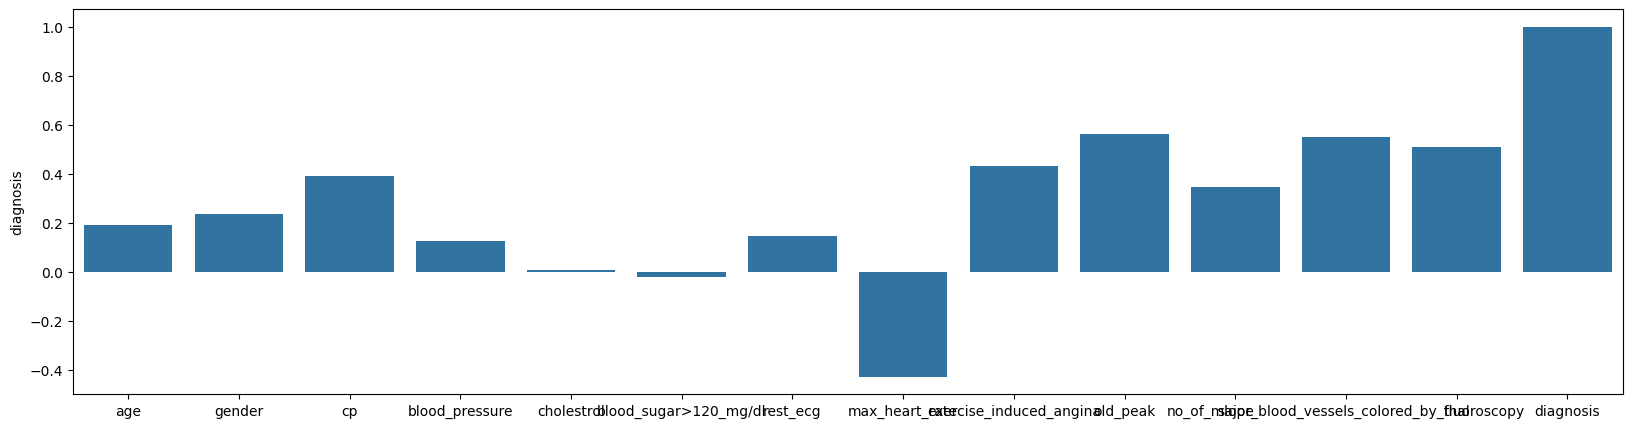

In [39]:
plt.figure(figsize=(20,5))
sns.barplot((xtrain.join(ytrain)).corr()['diagnosis'])

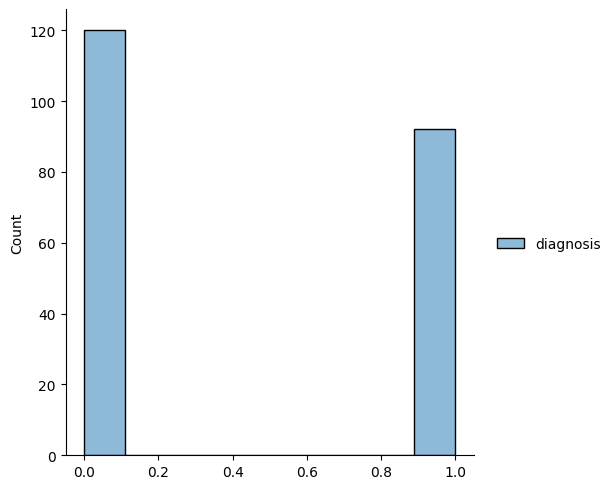

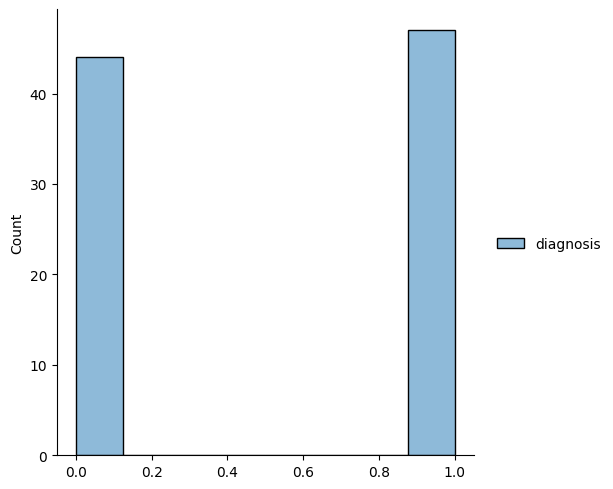

In [40]:
sns.displot(new_ytrain)
sns.displot(new_ytest)


In [41]:
correlation=abs(xtrain.join(ytrain).corr()[ytrain.columns])
selected_features=(correlation[correlation>correlation.quantile(0.5)].dropna().index).to_list()
selected_features=selected_features[:-1]
print(selected_features)

['cp', 'max_heart_rate', 'exercise_induced_angina', 'old_peak', 'no_of_major_blood_vessels_colored_by_fluoroscopy', 'thal']


In [42]:
sgd=SGDClassifier(loss='log_loss',fit_intercept=True,random_state=8)
sgd.fit(xtrain[selected_features],new_ytrain)
sgd_pred=sgd.predict(xtest[selected_features])
print(classification_report(sgd_pred,new_ytest))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.89      0.81      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



C:\Users\Acss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini',bootstrap=True,max_features='sqrt',random_state=8)
rf.fit(xtrain,new_ytrain)
print(classification_report((rf.predict(xtest)),new_ytest))

C:\Users\Acss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.81      0.88      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [52]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=8)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# Fit GridSearchCV
grid_search.fit(xtrain[selected_features], new_ytrain['diagnosis'])

print(classification_report((grid_search.best_estimator_).predict(xtest[selected_features]),new_ytest['diagnosis']))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        49
           1       0.77      0.86      0.81        42

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



In [54]:
import nbformat
# groupby num by age 
(xtrain.join(new_ytrain)).groupby('diagnosis')['age'].value_counts()
px.histogram(x=X['age'], color=new_ytrain['diagnosis'])

ValueError: All arguments should have the same length. The length of argument `color` is 212, whereas the length of  previously-processed arguments ['x'] is 303